# Euclid

In [1]:
# import all revelant packages
from headers import *

## Setting up the cosmology

In [2]:
# Using halofit to estimate the nonlinear matter power spectrum
eucParams = {
          'output': 'mPk',
          'P_k_max_h/Mpc': 40.,
          'non linear':'halofit', 
          'z_pk': '0.0,10',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'alpha_s': 0.,
          'h': 0.6770,
          'N_ur': 1.0196,
          'N_ncdm': 2,
          'm_ncdm': '0.01,0.05',
          'tau_reio': 0.0568,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923,
          'Omega_k': 0.}

eucCosmo = Class()
eucCosmo.set(eucParams)
eucCosmo.compute()

## Creating the experiment
PUMA will observe HI, so I set HI=True. This tells fishlss to use the HI bias and noise models. For now I'm ignoring photo-z errors, so I set $\sigma_z=0$.

In [3]:
euclid = experiment(zmin=0.7, zmax=2., nbins=3, fsky=0.5, sigma_z=0.0, Euclid=True) #5

## Defining the forecast
We will use velocileptors to calculate the nonlinear power spectrum and to model RSD. We choose $k_\text{min}=5\times 10^{-4} {\rm h Mpc^{-1}}$ to be small enough to avoid edge effects in our derivates.

In [4]:
eucCast = fisherForecast(experiment=euclid,cosmo=eucCosmo,params=eucParams,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='Euclid')

Here we choose the parameters to calculate the derivatives for.

In [5]:
eucCast.marg_params = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','fEDE','b','N',\
                                 'm_ncdm','N_ur','A_lin','alpha_s','b2',\
                                 'bs','alpha0','alpha2','alpha4','sn2','Omega_k'])

## Calculate the derivatives

In [6]:
eucCast.compute_derivatives()

In [7]:
eucCast.marg_params = np.array(['A_lin'])
omega_lins = np.logspace(np.log10(10),np.log10(250.),20)
for omega_lin in omega_lins:
   eucCast.omega_lin = omega_lin
   eucCast.compute_derivatives()

/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:160: RuntimeWarning: overflow encountered in multiply
  bias_integrands = bias_integrands * expon * self.yq**l
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:157: RuntimeWarning: overflow encountered in multiply
  bias_integrands = bias_integrands * expon
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:120: RuntimeWarning: overflow encountered in exp
  expon = np.exp(-0.5*ksq * (self.XYlin - self.sigma))
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:121: RuntimeWarning: overflow encountered in expm1
  exponm1 = np.expm1(-0.5*ksq * (self.XYlin - self.sigma))
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:157: RuntimeWarning: invalid value encountered in multiply
  bias_integrands = bias_integrands * expon
/home/noah/Documents/Berkeley/fishlss/LPT/velocity_moments_fftw.py:188: RuntimeWarning: overflow encountered in multiply
  bias_integrands = bias_integrands * expon * self.yq**l
/home/noah/Docum

In [8]:
eucCast.marg_params = np.array(['fEDE'])
log10z_cs = np.linspace(1.5,6.5,20)
for log10z_c in log10z_cs:
   eucCast.log10z_c = log10z_c
   eucCast.compute_derivatives()

## Check that the derivatives are reasonable

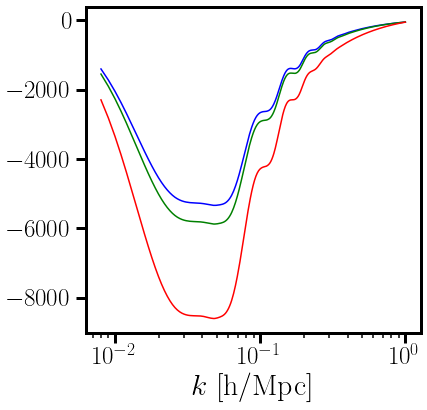

fEDE_3562_178.txt


<Figure size 432x288 with 0 Axes>

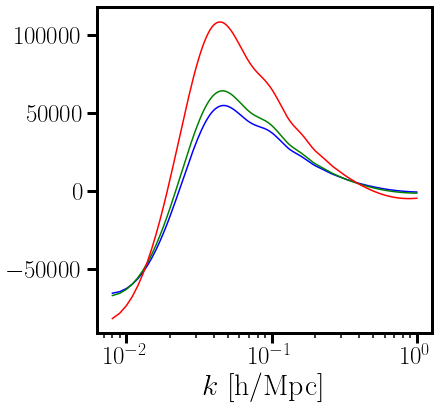

omega_cdm_91.txt


<Figure size 432x288 with 0 Axes>

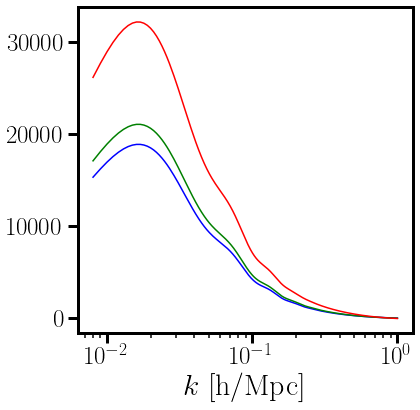

pfid_91.txt


<Figure size 432x288 with 0 Axes>

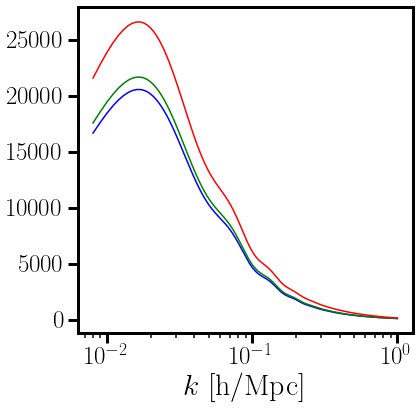

b_135.txt


<Figure size 432x288 with 0 Axes>

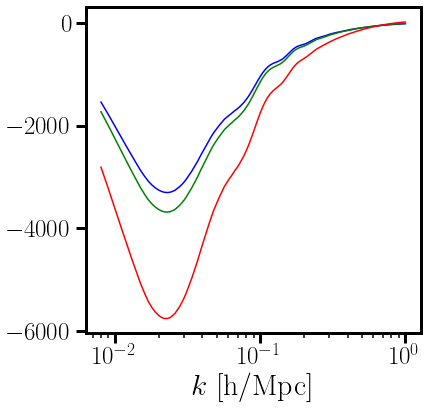

m_ncdm_135.txt


<Figure size 432x288 with 0 Axes>

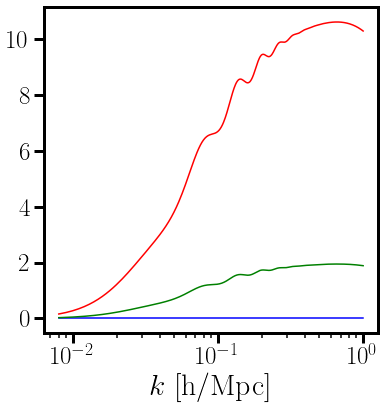

alpha2_135.txt


<Figure size 432x288 with 0 Axes>

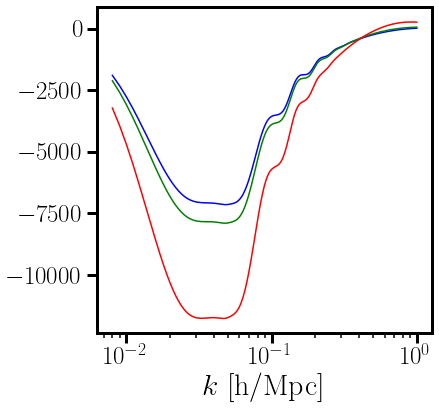

fEDE_3562_91.txt


<Figure size 432x288 with 0 Axes>

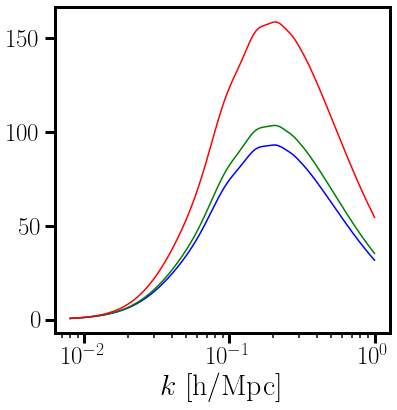

b2_178.txt


<Figure size 432x288 with 0 Axes>

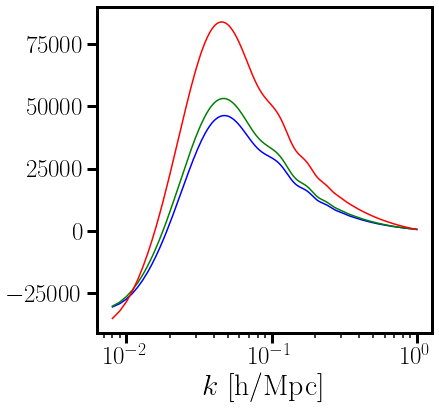

omega_cdm_178.txt


<Figure size 432x288 with 0 Axes>

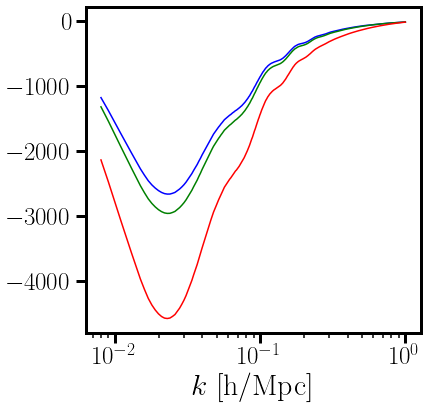

m_ncdm_178.txt


<Figure size 432x288 with 0 Axes>

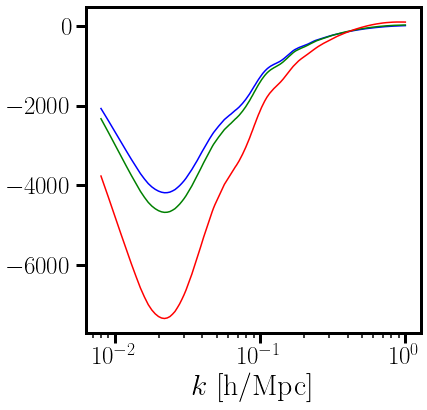

m_ncdm_91.txt


<Figure size 432x288 with 0 Axes>

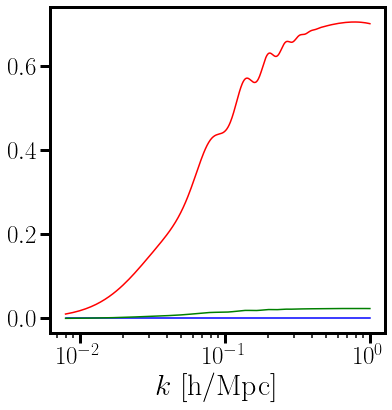

alpha4_178.txt


<Figure size 432x288 with 0 Axes>

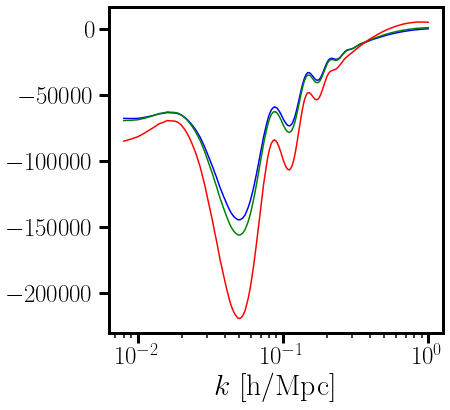

omega_b_91.txt


<Figure size 432x288 with 0 Axes>

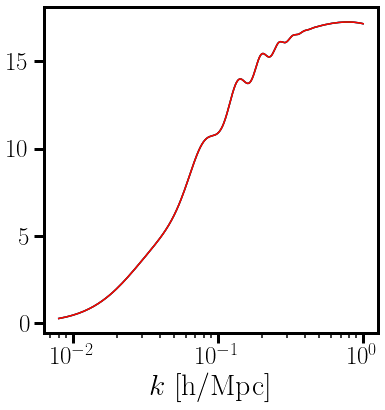

alpha0_178.txt


<Figure size 432x288 with 0 Axes>

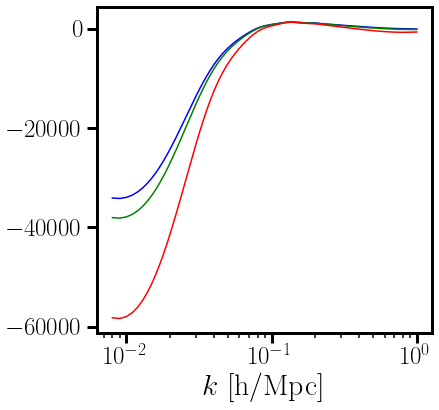

n_s_91.txt


<Figure size 432x288 with 0 Axes>

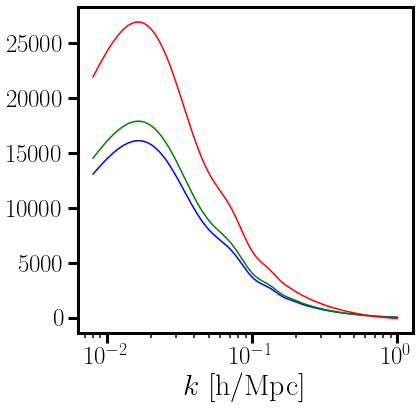

A_lin_1_135.txt


<Figure size 432x288 with 0 Axes>

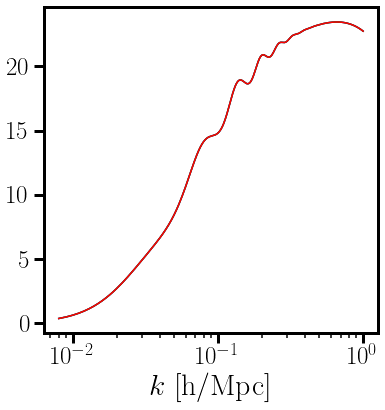

alpha0_135.txt


<Figure size 432x288 with 0 Axes>

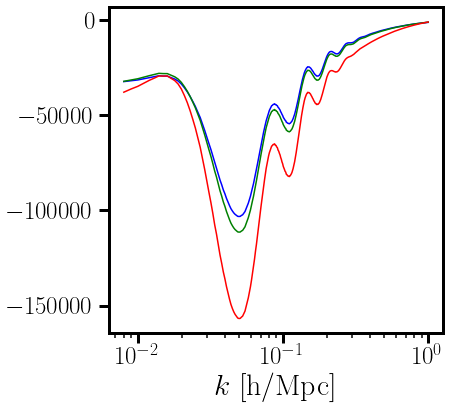

omega_b_178.txt


<Figure size 432x288 with 0 Axes>

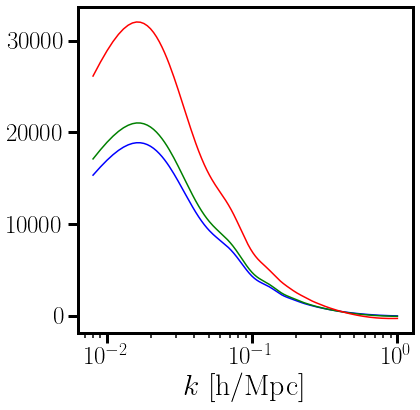

log(A_s)_91.txt


<Figure size 432x288 with 0 Axes>

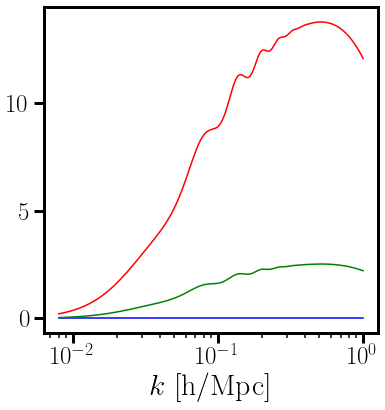

alpha2_91.txt


<Figure size 432x288 with 0 Axes>

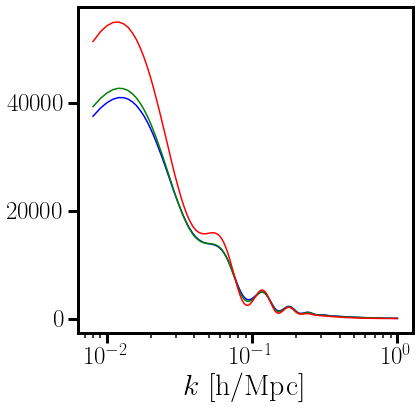

h_91.txt


<Figure size 432x288 with 0 Axes>

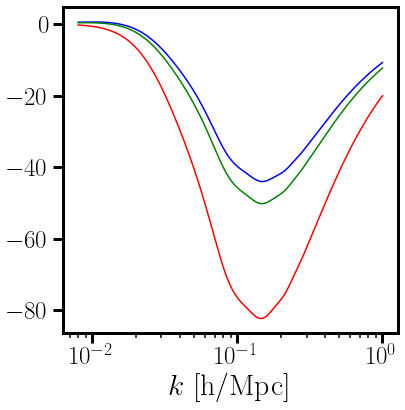

bs_135.txt


<Figure size 432x288 with 0 Axes>

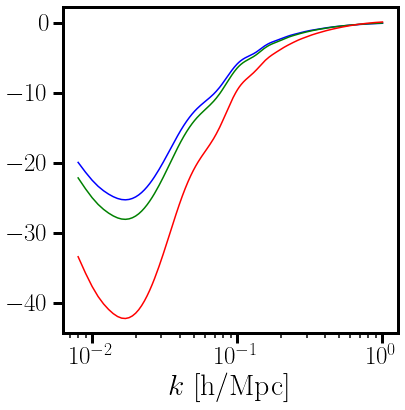

tau_reio_135.txt


<Figure size 432x288 with 0 Axes>

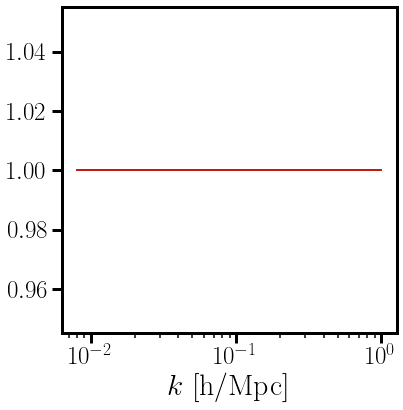

N_178.txt


<Figure size 432x288 with 0 Axes>

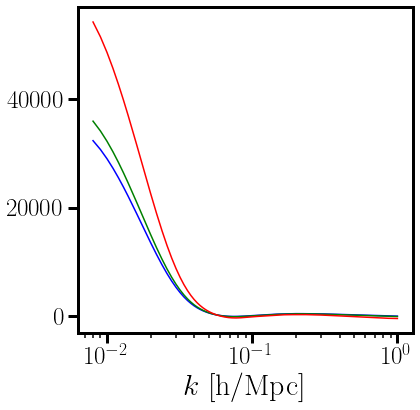

alpha_s_135.txt


<Figure size 432x288 with 0 Axes>

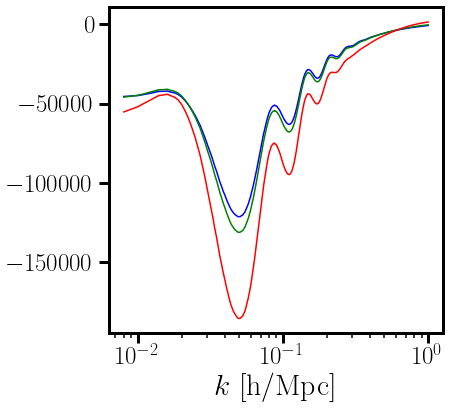

omega_b_135.txt


<Figure size 432x288 with 0 Axes>

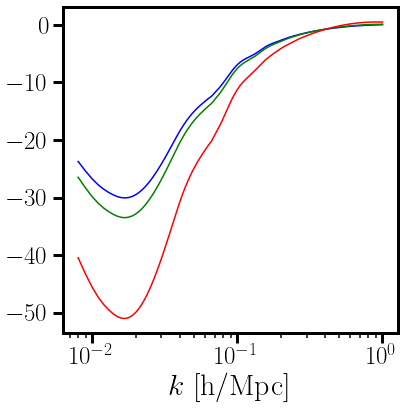

tau_reio_91.txt


<Figure size 432x288 with 0 Axes>

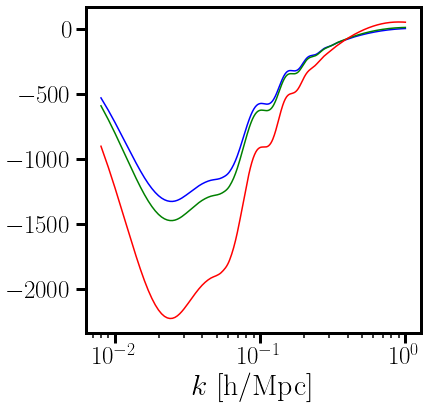

N_ur_91.txt


<Figure size 432x288 with 0 Axes>

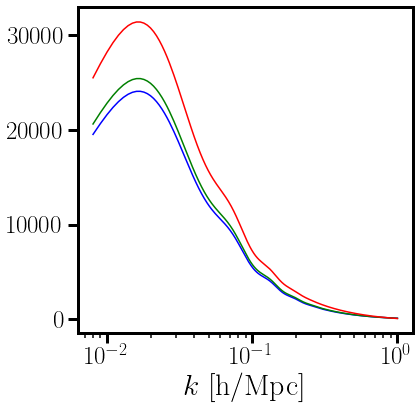

b_91.txt


<Figure size 432x288 with 0 Axes>

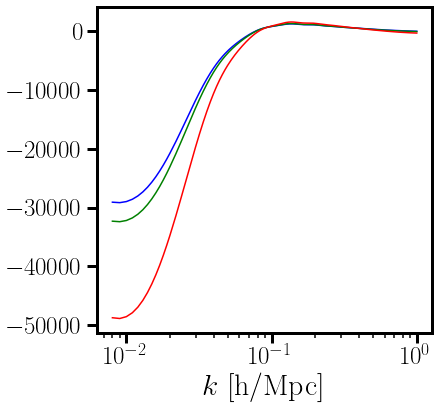

n_s_135.txt


<Figure size 432x288 with 0 Axes>

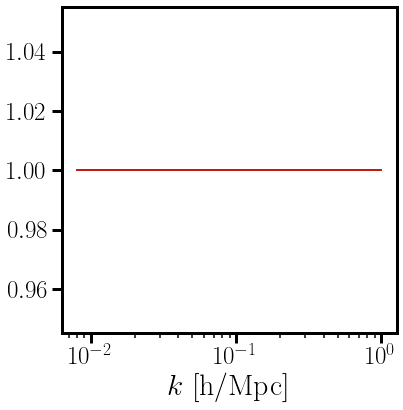

N_135.txt


<Figure size 432x288 with 0 Axes>

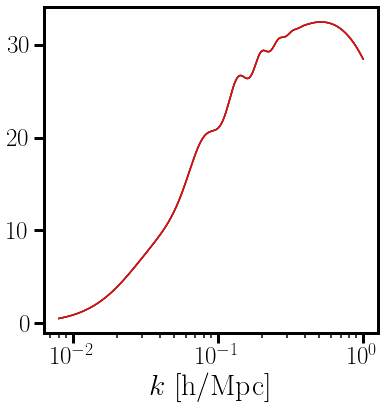

alpha0_91.txt


<Figure size 432x288 with 0 Axes>

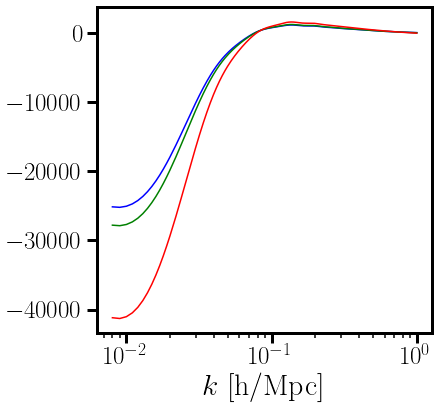

n_s_178.txt


<Figure size 432x288 with 0 Axes>

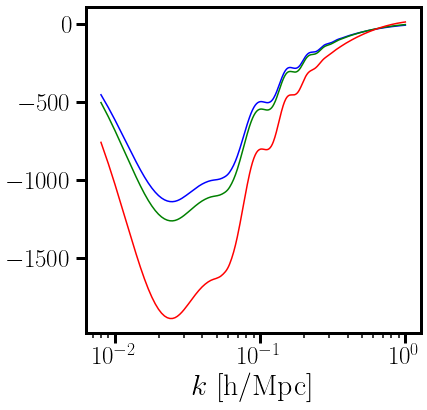

N_ur_135.txt


<Figure size 432x288 with 0 Axes>

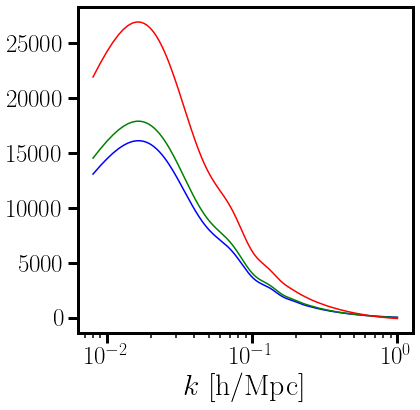

log(A_s)_135.txt


<Figure size 432x288 with 0 Axes>

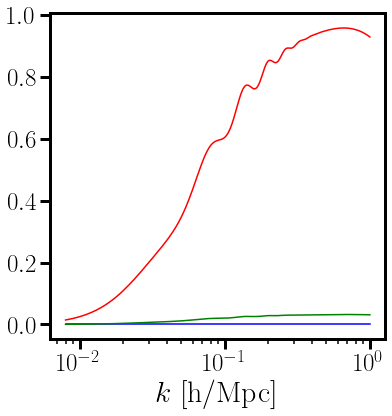

alpha4_135.txt


<Figure size 432x288 with 0 Axes>

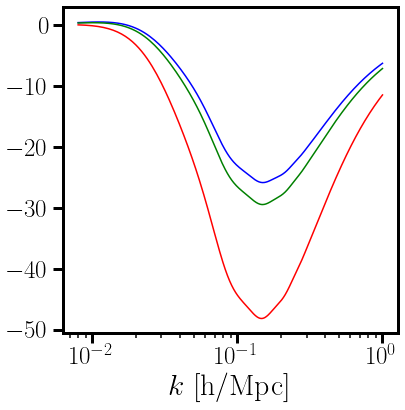

bs_178.txt


<Figure size 432x288 with 0 Axes>

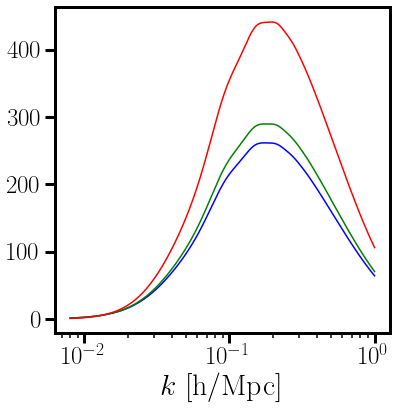

b2_91.txt


<Figure size 432x288 with 0 Axes>

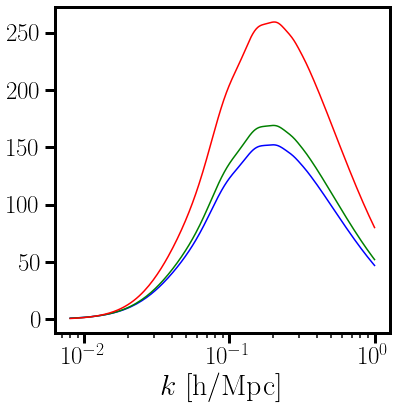

b2_135.txt


<Figure size 432x288 with 0 Axes>

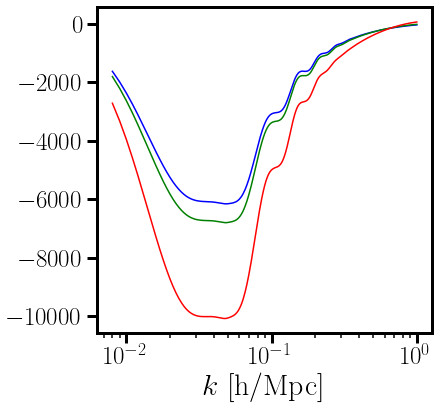

fEDE_3562_135.txt


<Figure size 432x288 with 0 Axes>

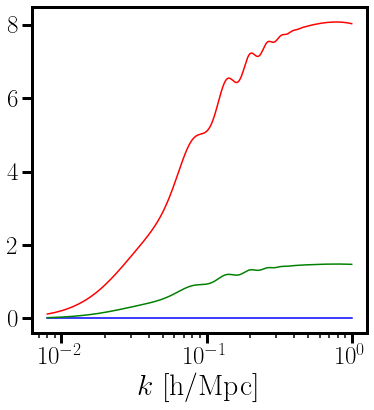

alpha2_178.txt


<Figure size 432x288 with 0 Axes>

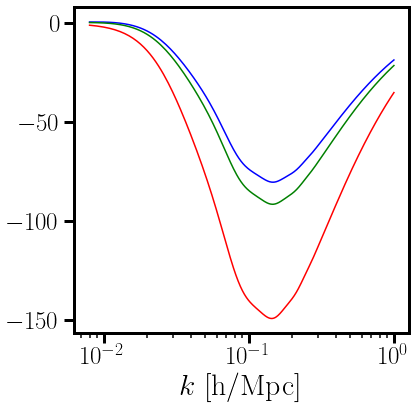

bs_91.txt


<Figure size 432x288 with 0 Axes>

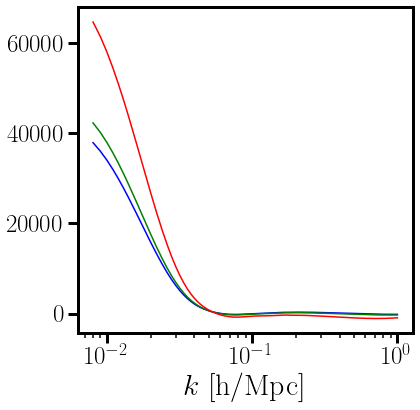

alpha_s_91.txt


<Figure size 432x288 with 0 Axes>

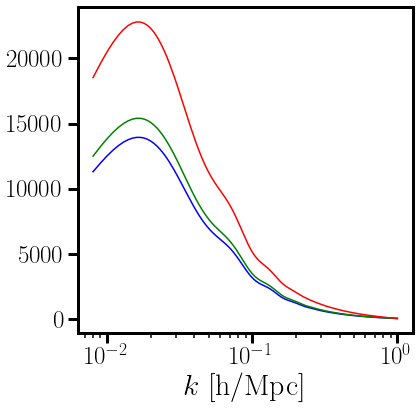

log(A_s)_178.txt


<Figure size 432x288 with 0 Axes>

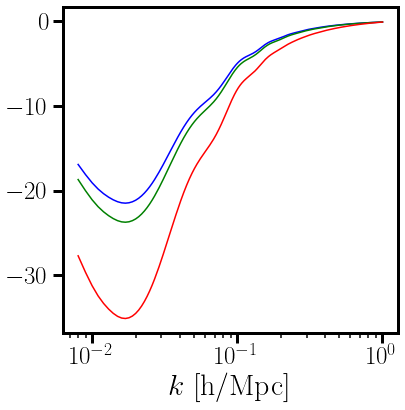

tau_reio_178.txt


<Figure size 432x288 with 0 Axes>

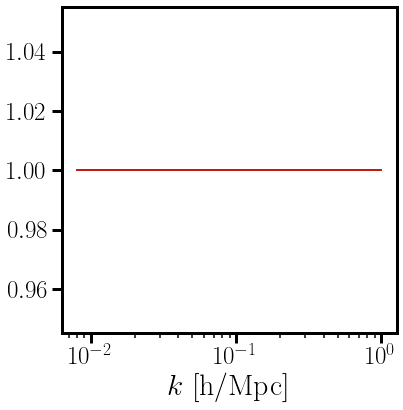

N_91.txt


<Figure size 432x288 with 0 Axes>

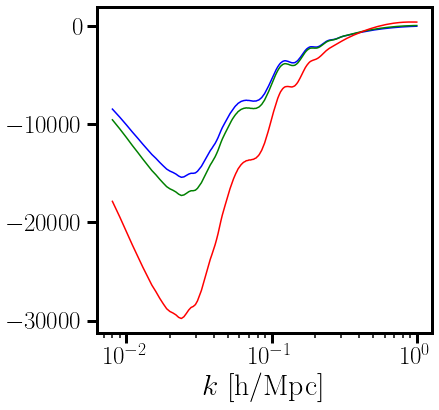

Omega_k_91.txt


<Figure size 432x288 with 0 Axes>

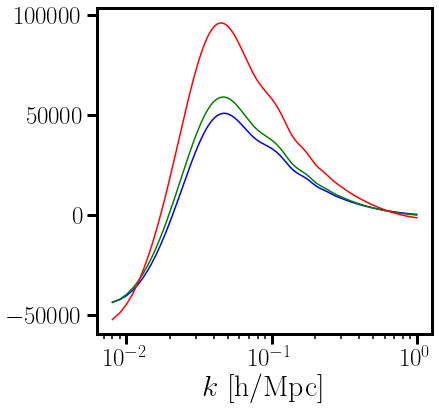

omega_cdm_135.txt


<Figure size 432x288 with 0 Axes>

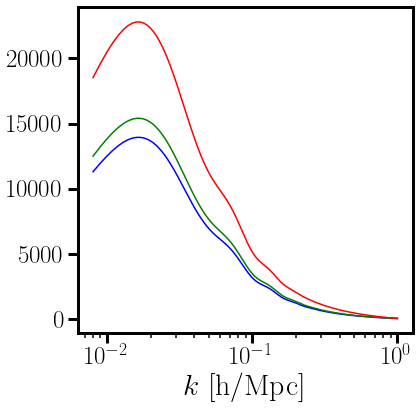

A_lin_1_178.txt


<Figure size 432x288 with 0 Axes>

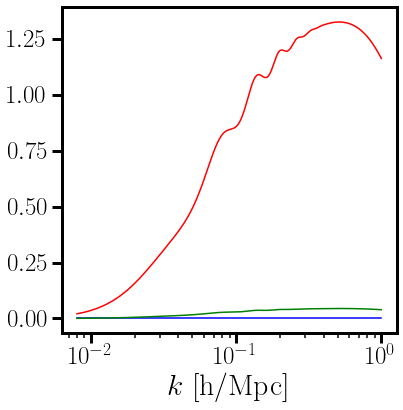

alpha4_91.txt


<Figure size 432x288 with 0 Axes>

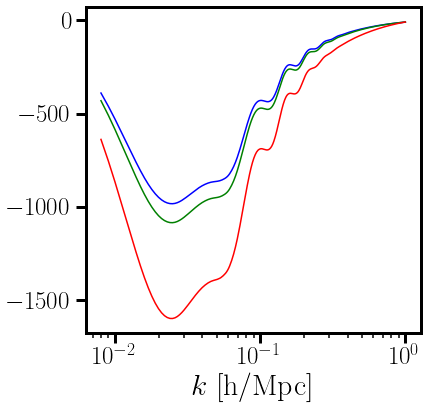

N_ur_178.txt


<Figure size 432x288 with 0 Axes>

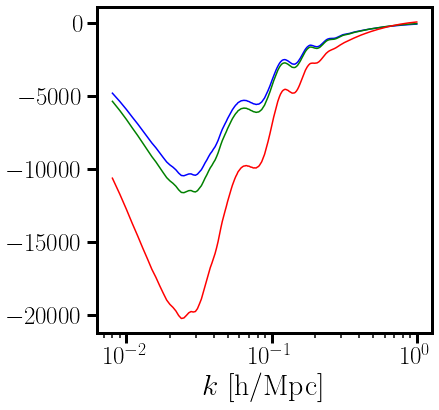

Omega_k_135.txt


<Figure size 432x288 with 0 Axes>

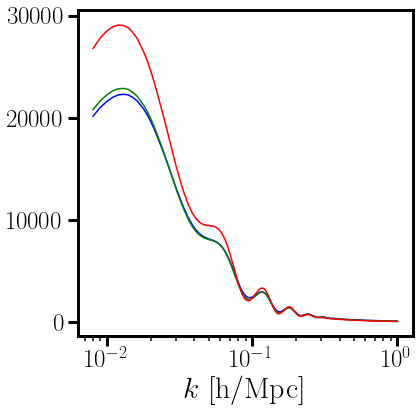

h_178.txt


<Figure size 432x288 with 0 Axes>

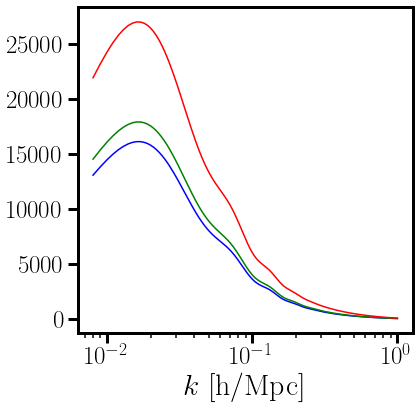

pfid_135.txt


<Figure size 432x288 with 0 Axes>

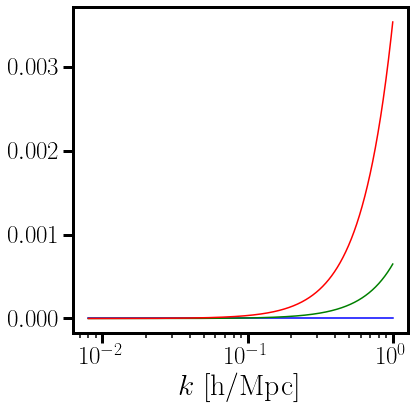

sn2_135.txt


<Figure size 432x288 with 0 Axes>

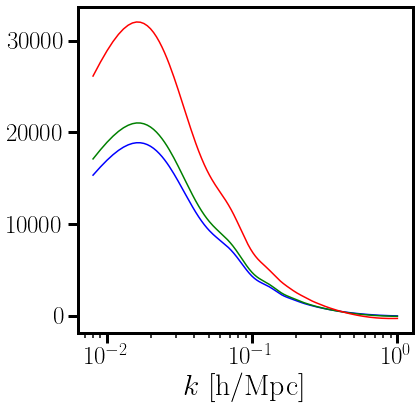

A_lin_1_91.txt


<Figure size 432x288 with 0 Axes>

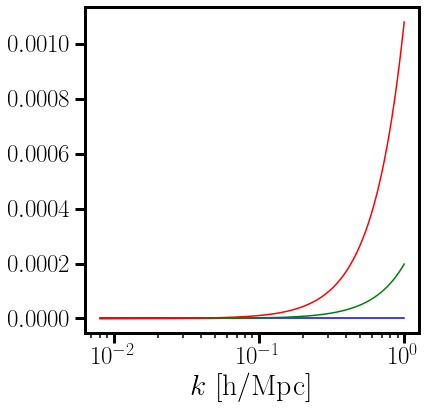

sn2_178.txt


<Figure size 432x288 with 0 Axes>

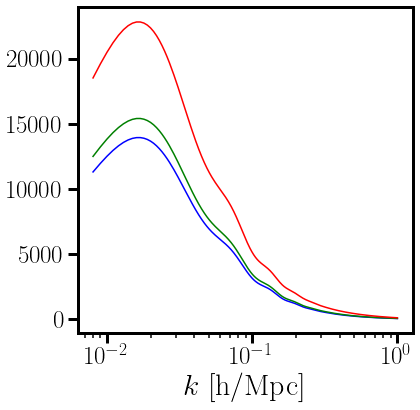

pfid_178.txt


<Figure size 432x288 with 0 Axes>

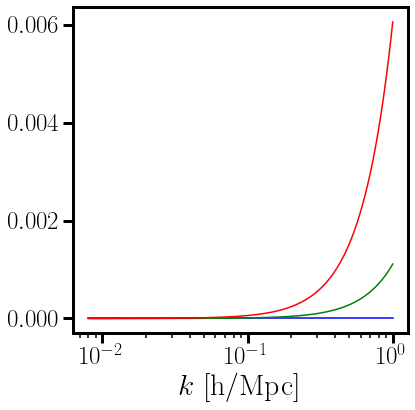

sn2_91.txt


<Figure size 432x288 with 0 Axes>

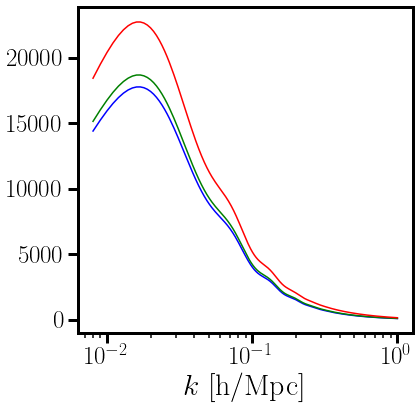

b_178.txt


<Figure size 432x288 with 0 Axes>

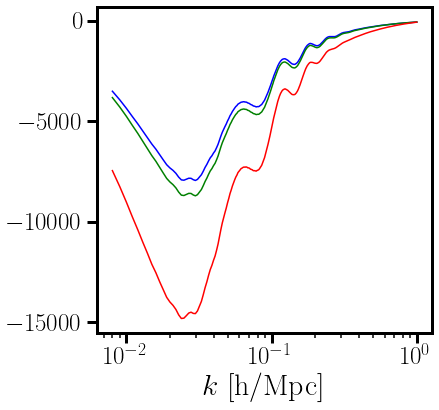

Omega_k_178.txt


<Figure size 432x288 with 0 Axes>

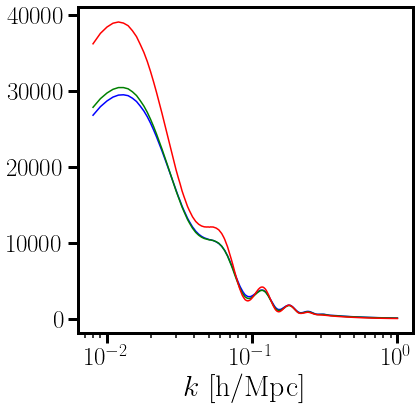

h_135.txt


<Figure size 432x288 with 0 Axes>

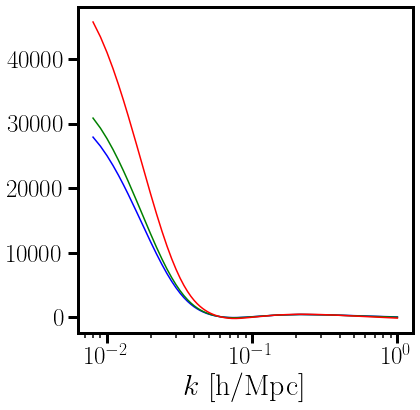

alpha_s_178.txt


<Figure size 432x288 with 0 Axes>

In [7]:
eucCast.check_derivatives()

Recalculate the derivatives that looked bad

In [8]:
#parameters = np.array(['N_ur','f_NL','omega_b','n_s','f_NL_eq','f_NL','fEDE','f_NL_eq','b2','Hz','A_lin'])
#z = np.array([2.25,3.25,4.75,2.75,4.75,4.25,3.75,2.25,2.75,2.25,2.25])
parameters = np.array(['m_ncdm'])
z = np.array([4.25])

In [9]:
megaCast.compute_derivatives(parameters=parameters, z=z)

Double check that this worked.

## Calculating the Fisher matrix

In [98]:
basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','bs',\
                  'alpha0','alpha2','alpha4','sn2','N','f_NL_eq'])

In [99]:
F = megaCast.gen_fisher(basis)

## Loading SO priors

In [7]:
SO = np.zeros((15,15))

# in H_0, tau_reio, omega_nu, omega_b, omega_cdm, A_s, n_s basis
tmp = np.genfromtxt('input/LAT_baseline_fsky04_fish_mat.dat')
# in h, tau_reio, omega_nu, omega_b, omega_cdm, log(A_s), n_s basis
tmp[0,:] *= 100.
tmp[:,0] *= 100.
tmp[5,:] *= megaParams['A_s']
tmp[:,5] *= megaParams['A_s']

mapping = {0:0,1:5,2:4,3:6,4:3,5:1}
for i in range(6):
    for j in range(6):
        SO[i,j] = tmp[mapping[i],mapping[j]]

In [8]:
SO_no_nonlin = np.zeros((13,13))

# in H_0, tau_reio, omega_nu, omega_b, omega_cdm, A_s, n_s basis
tmp = np.genfromtxt('input/LAT_baseline_fsky04_fish_mat.dat')
# in h, tau_reio, omega_nu, omega_b, omega_cdm, log(A_s), n_s basis
tmp[0,:] *= 100.
tmp[:,0] *= 100.
tmp[5,:] *= megaParams['A_s']
tmp[:,5] *= megaParams['A_s']

mapping = {0:0,1:5,2:4,3:6,4:3,5:1}
for i in range(6):
    for j in range(6):
        SO_no_nonlin[i,j] = tmp[mapping[i],mapping[j]]

# One-parameter extensions

In [9]:
def one_param_extension_constraint(n,zmax,param,include_SO=False):
   '''
   Function that returns the uncertainty of param for 
   a given number density and zmax, assuming zmin=2
   '''
   megaMapper_fake = experiment(zmin=2., zmax=zmax, nbins=int((zmax-2.)/0.5), fsky=0.5, \
                     sigma_z=0.0, LBG=True, custom_n=True, n=n)
   megaCast_fake = fisherForecast(experiment=megaMapper_fake,cosmo=megaCosmo,params=megaParams,khmin=5.e-4,\
                       khmax=1.,Nk=200,Nmu=200,velocileptors=True,name='MegaMapper')
   basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','bs',\
                  'alpha0','alpha2','alpha4','sn2','N',param])
   F = megaCast_fake.gen_fisher(basis)
   # to include SO, first save a nice looking array
   if include_SO: return np.sqrt(np.linalg.inv(F+SO)[-1,-1])
   return np.sqrt(np.linalg.inv(F)[-1,-1])

In [10]:
ns = np.array([0.001,0.005,0.01,0.05,0.1])
zmaxs = np.array([2.5,3.,3.5,4.,4.5,5.])
#zmaxs = np.array([3.5,4.,4.5,5.])

In [11]:
param = 'm_ncdm'

In [12]:
sigmas = np.zeros((len(ns),len(zmaxs)))
for i,n in enumerate(ns):
   for j,zmax in enumerate(zmaxs):
      print('n=',n,'zmax=',zmax)
      sigmas[i,j] = one_param_extension_constraint(n,zmax,param,include_SO=True)

n= 0.001 zmax= 2.5
n= 0.001 zmax= 3.0
n= 0.001 zmax= 3.5
n= 0.001 zmax= 4.0
n= 0.001 zmax= 4.5
n= 0.001 zmax= 5.0
n= 0.005 zmax= 2.5
n= 0.005 zmax= 3.0
n= 0.005 zmax= 3.5
n= 0.005 zmax= 4.0
n= 0.005 zmax= 4.5
n= 0.005 zmax= 5.0
n= 0.01 zmax= 2.5
n= 0.01 zmax= 3.0
n= 0.01 zmax= 3.5
n= 0.01 zmax= 4.0
n= 0.01 zmax= 4.5
n= 0.01 zmax= 5.0
n= 0.05 zmax= 2.5
n= 0.05 zmax= 3.0
n= 0.05 zmax= 3.5
n= 0.05 zmax= 4.0
n= 0.05 zmax= 4.5
n= 0.05 zmax= 5.0
Have not calculated derivative of b2


TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

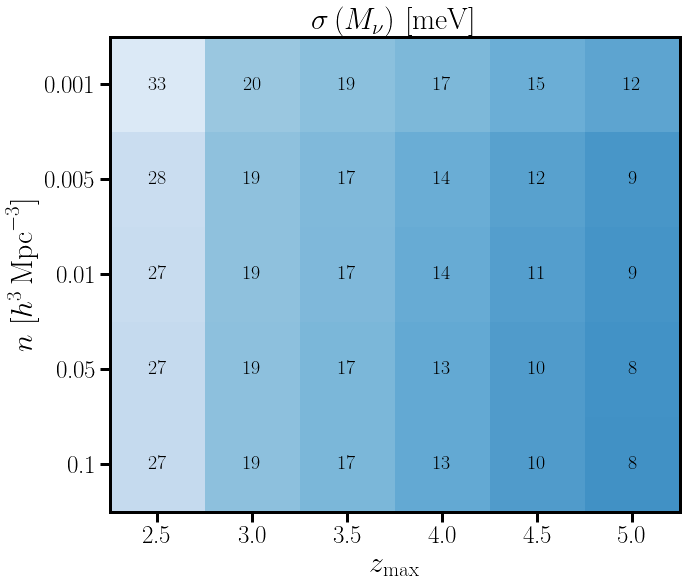

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sigmas*1000,cmap='Blues_r',vmin=-10,vmax=40)
ax.set_yticks(np.arange(len(ns)))
ax.set_xticks(np.arange(len(zmaxs)))
ax.set_yticklabels(ns.astype(str))
ax.set_xticklabels(zmaxs.astype(str))
for i in range(len(ns)):
    for j in range(len(zmaxs)):
        ax.text(j, i, str(int(sigmas[i, j]*1000)),ha="center", va="center", color="k",fontsize=20)
ax.set_xlabel(r'$z_\text{max}$')
ax.set_ylabel(r'$n\,\,[h^3\,{\rm Mpc}^{-3}]$')
ax.set_title(r'$\sigma\left(M_\nu\right)\,{\rm [meV]}$')
fig.tight_layout()
plt.savefig('figures/sigma_mnu_vs_n_and_zmax_with_SO.pdf')

In [ ]:
pumaCast.marg_params = np.array(['A_lin'])
omega_lins = np.logspace(np.log10(10),np.log10(250.),20)
for omega_lin in omega_lins:
   pumaCast.omega_lin = omega_lin
   pumaCast.compute_derivatives()

In [ ]:
pumaCast.marg_params = np.array(['fEDE'])
log10z_cs = np.linspace(1.5,6.5,20)
for log10z_c in log10z_cs:
   pumaCast.log10z_c = log10z_c
   pumaCast.compute_derivatives()